In [1]:
from modules import *
import pandas as pd
from multiprocessing import Pool
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("./individual_book_train/stock_20.csv")
df = df.loc[df['time_id'] == 16526]
df['WAP'] = calculate_wap(df['bid_price1'], df['ask_price1'], df['bid_size1'], df['ask_size1'])
df['log_return'] = calculate_log_returns(df['WAP'])
train_X, validation_y = generate_data(df, 30)
GARCH = GARCH_model(train_X, validation_y)
result = GARCH.predict()
print(GARCH.assessing_model())

42.65105491511349


In [7]:
# # Assessing model with all time_ids in 1 Stock and visualize

# df_stock = pd.read_csv('./individual_book_train/stock_1.csv')
# df_stock['WAP'] = calculate_wap(df_stock['bid_price1'], df_stock['ask_price1'], df_stock['bid_size1'], df_stock['ask_size1'])
# df_stock['log_return'] = calculate_log_returns(df_stock['WAP'])
# df_stock = df_stock.groupby('time_id')
# MAPEs = []
# for group_name, group_df in df_stock:
#     train_X, validation_y = generate_data(group_df, 60)
#     GARCH = GARCH_model(train_X, validation_y)
#     result = GARCH.predict()
#     key = group_name
#     MAPEs.append(GARCH.assessing_model())

In [8]:
# print(np.mean(np.array(MAPEs)))

In [2]:
# Use multiple processing to optimize running time
with Pool(processes=8) as pool:
    stock_ids = range(0, 127)
    results = pool.map(process_stock_by_MAPE, stock_ids)

all_results = []
all_keys = []
for res, keys in results:
    all_results.extend(res)
    all_keys.extend(keys)

File not found: stock_24.csv
File not found: stock_25.csv
File not found: stock_12.csv


KeyboardInterrupt: 

In [2]:
with Pool(processes=8) as pool:
    stock_ids = range(0, 127)
    results = pool.map(process_stock_by_SMAPE, stock_ids)

all_results_SMAPE = []
all_keys_SMAPE = []
for res, keys in results:
    all_results_SMAPE.extend(res)
    all_keys_SMAPE.extend(keys)

File not found: stock_12.csv
File not found: stock_24.csv
File not found: stock_25.csv
File not found: stock_57.csv
File not found: stock_45.csv
File not found: stock_49.csv
File not found: stock_54.csv
File not found: stock_65.csv
File not found: stock_92.csv
File not found: stock_71.csv
File not found: stock_79.csv
File not found: stock_91.csv
File not found: stock_117.csv
File not found: stock_106.csv
File not found: stock_121.csv


In [4]:
data_SMAPE = {
    'ID': all_keys_SMAPE,
    'SMAPE': all_results_SMAPE,
}
df_SMAPE = pd.DataFrame(data_SMAPE)
df_SMAPE.to_pickle('GARCH_SMAPE.pkl')
df_SMAPE.to_csv('GARCH_SMAPE.csv', index=False)

In [10]:
results = np.array(all_results)
print(np.mean(results[~np.isnan(results)]))

219.01821720741899


In [11]:
print(np.array(all_keys))

['0-5' '0-11' '0-16' ... '126-32758' '126-32763' '126-32767']


In [3]:
# Clustering Data Generation
stock_ids = range(0, 127)

# Initialize the multiprocessing pool
with Pool(processes=8) as pool:
    results = pool.map(process_generate_time_id_feature, stock_ids)

# Process the results
all_price_changes = []
all_keys_2 = []
for result in results:
    if result is not None:
        price_changes, keys = result
        all_price_changes.extend(price_changes)
        all_keys_2.extend(keys)


In [14]:
# K-means model for clustering
data = np.array(all_price_changes).reshape(-1, 1) 
k = 6
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(data)

labels = kmeans.labels_

In [15]:
# data_MAPE = {
#     'ID': all_keys,
#     'MAPE': all_results,
# }
data_cluster = {
    'ID': all_keys_2,
    'Cluster': labels
}

df_cluster = pd.DataFrame(data_cluster)
# df_MAPE = pd.DataFrame(data_MAPE)
df_MAPE = pd.read_csv('GARCH_MAPE.csv')
df = pd.merge(df_MAPE, df_cluster, on='ID', how='inner')

In [6]:
df_MAPE.to_pickle('GARCH_MAPE.pkl')
df_MAPE.to_csv('GARCH_MAPE.csv', index=False)

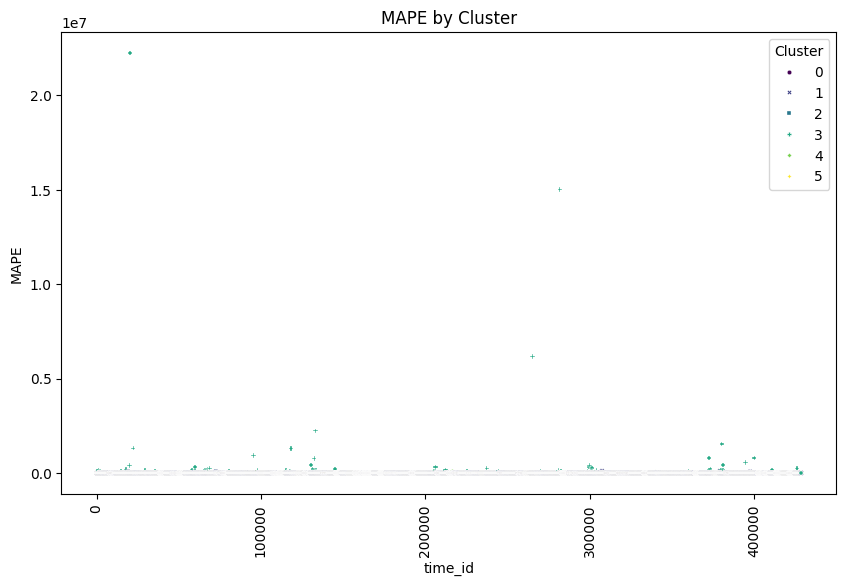

In [16]:
df_MAPE = pd.read_csv('GARCH_MAPE.csv')
data_cluster = {
    'ID': all_keys_2,
    'Cluster': labels
}
df_cluster = pd.DataFrame(data_cluster)
df = pd.merge(df_MAPE, df_cluster, on='ID', how='inner')

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=df.index, y='MAPE', hue='Cluster', palette='viridis', style='Cluster', s=10)
plt.xticks(rotation=90)  # Rotate stock IDs for better visibility if necessary
plt.title('MAPE by Cluster')
plt.xlabel('time_id')
plt.ylabel('MAPE')
plt.show()

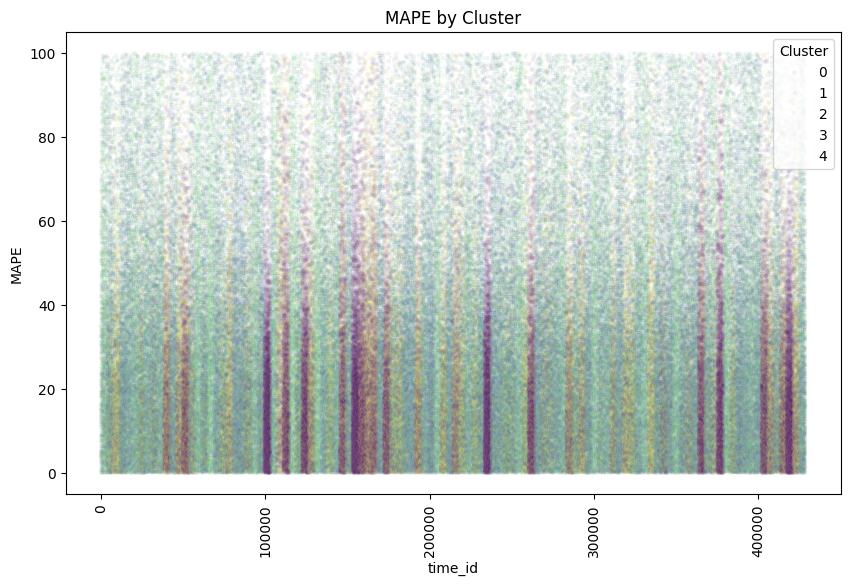

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df.loc[df['MAPE']<100], x=df.loc[df['MAPE']<100].index, y='MAPE', hue='Cluster', palette='viridis', style='Cluster', s=10, alpha=0.05)
plt.xticks(rotation=90)  # Rotate stock IDs for better visibility if necessary
plt.title('MAPE by Cluster')
plt.xlabel('time_id')
plt.ylabel('MAPE')
plt.show()

In [17]:
lower_percentile = np.percentile(df_MAPE['MAPE'], 0.5)
upper_percentile = np.percentile(df_MAPE['MAPE'], 99)

# Filter the DataFrame to only include MAPE values within the 99% CI
filtered_df = df_MAPE[(df_MAPE['MAPE'] >= lower_percentile) & (df_MAPE['MAPE'] <= upper_percentile)]

# Calculate the average MAPE within this filtered DataFrame
average_mape_99ci = filtered_df['MAPE'].mean()
print("Average MAPE within the 99% Confidence Interval:", average_mape_99ci)

Average MAPE within the 99% Confidence Interval: 44.879978400190765


In [80]:
filtered_df.to_csv('confident_MAPE.csv', index=False)

In [18]:
df_MAPE_cluster = pd.merge(filtered_df, df_cluster, on='ID', how='inner')
df_feature = pd.read_csv('./combined_features.csv')
df_mape_by_cluster = df_MAPE_cluster.groupby('Cluster')
for group_name, group_df in df_mape_by_cluster:
    print(f"Mean MAPE for Cluster Label {group_name}:", group_df['MAPE'].mean())
    mean_feature = df_feature.loc[df_feature['ID'].isin(group_df['ID'])]
    print(f"Mean Value:{mean_feature['price_change_count1'].mean()}")


Mean MAPE for Cluster Label 0: 22.381658925864553
Mean Value:503.550535559201
Mean MAPE for Cluster Label 1: 55.34501887239805
Mean Value:200.8161390847958
Mean MAPE for Cluster Label 2: 33.95329844534038
Mean Value:347.07612514639453
Mean MAPE for Cluster Label 3: 79.4895726297705
Mean Value:130.97716620413198
Mean MAPE for Cluster Label 4: 29.276560867788934
Mean Value:423.88077343421605
Mean MAPE for Cluster Label 5: 40.96813415861393
Mean Value:272.2746337051553


## ARIMA-GARCH Model Optimization

In [ ]:
# Add more features in clustering to see if it works
stock_ids = range(0, 127)
with Pool(processes=8) as pool:
    all_results = pool.map(process_generate_features, stock_ids)

final_results = pd.concat(all_results, ignore_index=True)
final_results.to_csv('combined_features.csv', index=False)
print("All features generated and saved.")

All features generated and saved.


In [ ]:
df_MAPE = pd.read_csv('confident_MAPE.csv')
df_features = pd.read_csv('combined_features.csv')

In [ ]:
df_combined = pd.merge(df_features, df_MAPE, on='ID', how='inner')
df_combined.to_csv('features_MAPE.csv')

In [ ]:
df_data = df_combined.select_dtypes(include=[np.number])

correlation_matrix = df_data.corr()

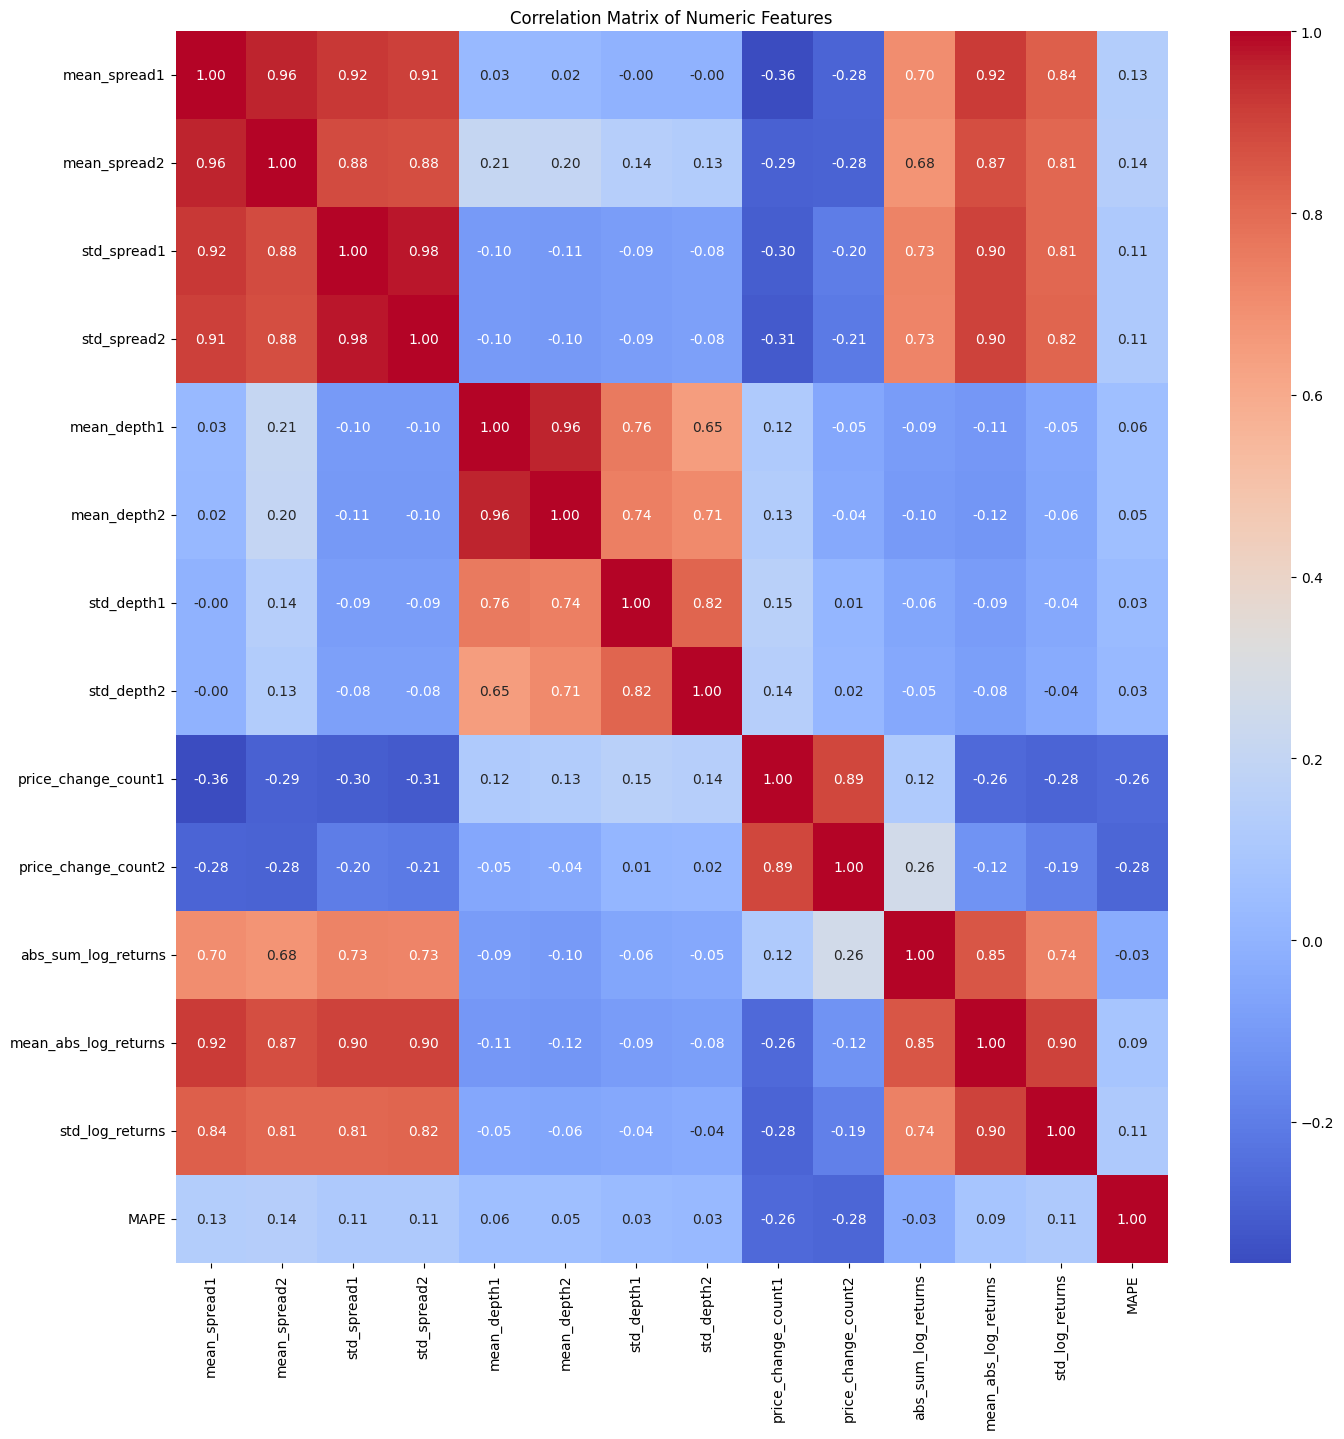

In [ ]:
plt.figure(figsize=(16, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [ ]:
from sklearn.feature_selection import mutual_info_regression

# Assuming df_data is your DataFrame and 'MAPE' is your continuous target variable
# Ensure that all features are numeric and there are no missing values

# Dropping 'MAPE' column from features and using 'MAPE' as the target
X = df_data.drop('MAPE', axis=1)
y = df_data['MAPE']

# Calculating mutual information between features and the continuous target
mi = mutual_info_regression(X, y)
mi_scores = pd.Series(mi, index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

print(mi_scores)

price_change_count2     0.047787
price_change_count1     0.044941
mean_spread1            0.018129
std_spread1             0.016580
std_spread2             0.016578
mean_spread2            0.013929
mean_depth2             0.011815
std_log_returns         0.008340
mean_depth1             0.008030
std_depth2              0.006636
mean_abs_log_returns    0.005839
std_depth1              0.004482
abs_sum_log_returns     0.003856
dtype: float64


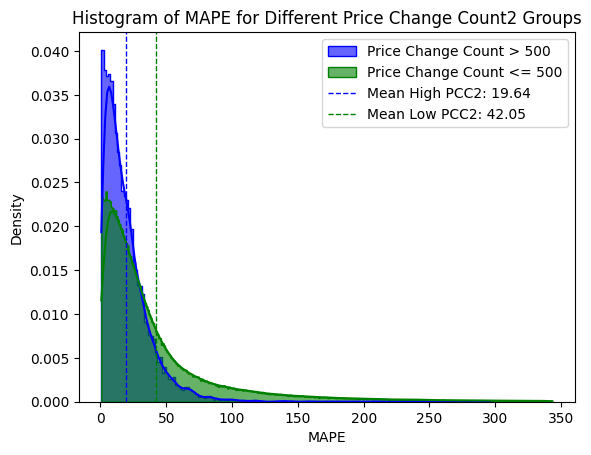

In [85]:
high_pcc2 = df_data[df_data['price_change_count2'] > 500]
low_pcc2 = df_data[df_data['price_change_count2'] <= 500]
mean_high_pcc2 = high_pcc2['MAPE'].mean()
mean_low_pcc2 = low_pcc2['MAPE'].mean()

# Plot histograms
sns.histplot(high_pcc2['MAPE'], color="blue", label='Price Change Count > 500', kde=True, alpha=0.6, element='step', stat="density")
sns.histplot(low_pcc2['MAPE'], color="green", label='Price Change Count <= 500', kde=True, alpha=0.6, element='step', stat="density")

# Add mean lines
plt.axvline(mean_high_pcc2, color='blue', linestyle='dashed', linewidth=1, label=f'Mean High PCC2: {mean_high_pcc2:.2f}')
plt.axvline(mean_low_pcc2, color='green', linestyle='dashed', linewidth=1, label=f'Mean Low PCC2: {mean_low_pcc2:.2f}')

# Add title and labels
plt.title('Histogram of MAPE for Different Price Change Count2 Groups')
plt.xlabel('MAPE')
plt.ylabel('Density')  # Changed from 'Frequency' to 'Density' due to KDE plot

# Add legend
plt.legend()

# Show plot
plt.show()